# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [122]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [124]:
spaceship.shape

(8693, 14)

**Check for data types**

In [125]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [126]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [127]:
spaceship = spaceship.dropna()

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [128]:
spaceship['Cabin'] = spaceship['Cabin'].str[0]

- Drop PassengerId and Name

In [129]:
spaceship = spaceship.drop(columns=['PassengerId', 'Name'])

- For non-numerical columns, do dummies.

In [130]:
spaceship['CryoSleep'] = spaceship['CryoSleep'].astype(int)
spaceship['VIP'] = spaceship['VIP'].astype(int)

spaceship = pd.get_dummies(spaceship, columns = ['HomePlanet', 'Cabin', 'Destination'])

spaceship_boolean = spaceship.select_dtypes(include=['bool']).columns
spaceship[spaceship_boolean] = spaceship[spaceship_boolean].astype(bool).astype(int)

**Perform Train Test Split**

In [131]:
spaceship.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [132]:
y = spaceship['Transported']
X = spaceship.drop(columns=['Transported', 'ShoppingMall'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [133]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = StandardScaler()

In [134]:
normalizer.fit(X_train)

StandardScaler()

In [135]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

- Evaluate your model's performance. Comment it

In [137]:
from sklearn.metrics import f1_score

y_pred = knn.predict(X_test_norm)

f1 = f1_score(y_test, y_pred, average='binary')

print('F1 score: ', f1)

F1 score:  0.7629796839729119


In [141]:
from sklearn.metrics import confusion_matrix

# Calcula y muestra una matriz de confusión utilizando Seaborn
def calcularMatrizConfusion(y_test, y_pred):    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(1,figsize=(10,8))
    sns.heatmap(cm, annot=True) #fmt='d', cmap='Blues', xticklabels=class_names,  yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion matrix')
    plt.show

Accuracy: 0.7617246596066566
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       661
           1       0.76      0.77      0.76       661

    accuracy                           0.76      1322
   macro avg       0.76      0.76      0.76      1322
weighted avg       0.76      0.76      0.76      1322



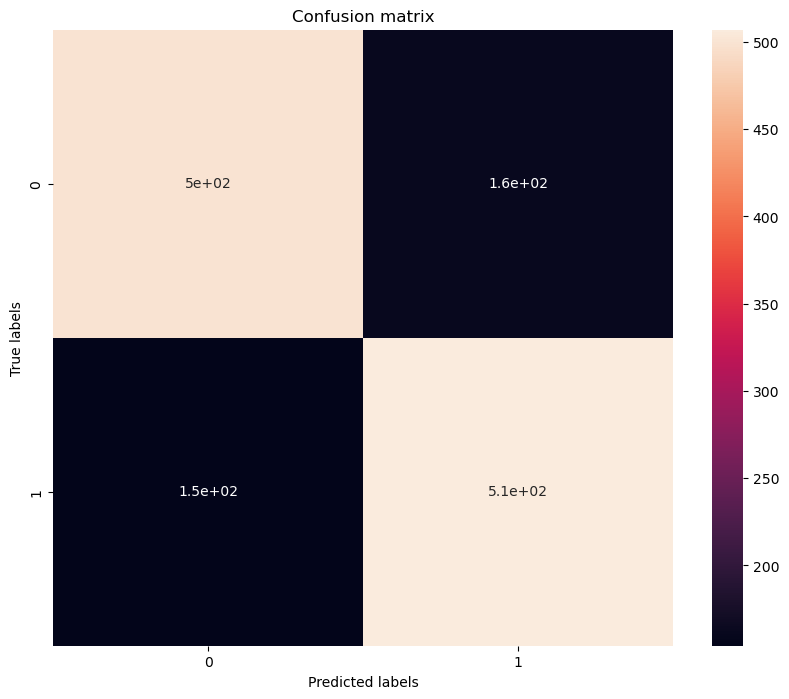

In [142]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
calcularMatrizConfusion(y_test, y_pred)